<a href="https://colab.research.google.com/github/amirawaleed556/AI_projects_python_amira/blob/main/Skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [3]:
#Initialising the CNN
classifier = Sequential()

In [4]:
# Step1 - Convolution
# Input Layer/dimensions
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
classifier.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

In [5]:
# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
classifier.add(Convolution2D(64,3,3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
# step3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())

In [7]:
# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie dog or cat
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
# sigmoid helps in 0 1 classification

# Compiling the CNN
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/skin_cancer_detect/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2637 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/skin_cancer_detect/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 12 images belonging to 2 classes.


In [12]:
# steps_per_epoch it will transfer that many images at 1 time
# & epochs means 'steps_per_epoch' will repeat that many times
 
history=classifier.fit_generator(
        training_set,
        steps_per_epoch=2,
        epochs=30,
        validation_steps=2,
        validation_data=test_set)

score = classifier.evaluate(training_set)

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5469 

2/2 [==============================] - 33s 12s/step - loss: 0.6854 - accuracy: 0.5469 - val_loss: 0.7882 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 23s 14s/step - loss: 0.6856 - accuracy: 0.5469
Epoch 3/30
2/2 [==============================] - 19s 11s/step - loss: 0.6713 - accuracy: 0.5938
Epoch 4/30
2/2 [==============================] - 16s 9s/step - loss: 0.6913 - accuracy: 0.5312
Epoch 5/30
2/2 [==============================] - 13s 7s/step - loss: 0.7075 - accuracy: 0.4688
Epoch 6/30
2/2 [==============================] - 18s 8s/step - loss: 0.6603 - accuracy: 0.6406
Epoch 7/30
2/2 [==============================] - 17s 9s/step - loss: 0.6688 - accuracy: 0.5938
Epoch 8/30
2/2 [==============================] - 17s 8s/step - loss: 0.6777 - accuracy: 0.5625
Epoch 9/30
2/2 [==============================] - 13s 7s/step - loss: 0.6968 - accuracy: 0.4844
Epoch 10/30
2/2 [==============================] - 10s 5s/step - loss: 0.6839 - accuracy: 0.4844
E

In [13]:
print('Test accuracy:', score[1]*100, '%')

Test accuracy: 57.22411870956421 %


In [31]:
import tensorflow as tf
import keras.utils as image

test_image = tf.keras.utils.load_img('/content/drive/MyDrive/skin_cancer_detect/1175.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'benign'
else:
    prediction = 'malignant'
    
print('The prediction result is :',prediction)

1/1 [==============================] - 0s 144ms/step
The prediction result is : benign


In [33]:
test_image = image.load_img('/content/drive/MyDrive/skin_cancer_detect/1140.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'malignant'
else:
    prediction = 'benign'   

print('The prediction result is :',prediction)

1/1 [==============================] - 0s 20ms/step
The prediction result is : malignant


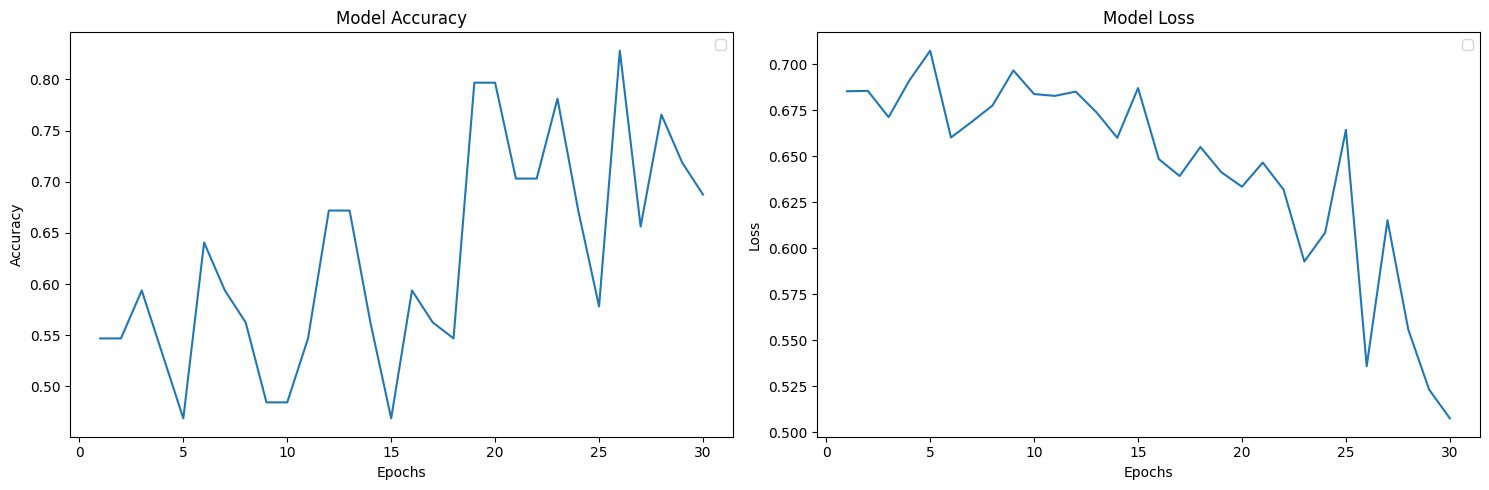

In [44]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc)

plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss)

plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()